In [1]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
import os
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import g_key

In [2]:
# Read in measurements csv
measurements_df = pd.read_csv("hawaii_measurements.csv")
measurements_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
# Read in stations csv
stations_df = pd.read_csv("hawaii_stations.csv")
stations_df.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [4]:
# Join measurements and stations dataframes
hawaii_df = pd.merge(measurements_df, stations_df, on="station")
hawaii_df.head()

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,NaN,73,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [5]:
# Clean up the dataframe from na entries
hawaii_df = hawaii_df.dropna(how='any')
hawaii_df.head()

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
5,USC00519397,2010-01-07,0.06,70,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [6]:
# Count the number of stations and create dataframe
station_group = hawaii_df.groupby('station')
station_count = station_group['date'].count()

station_df = pd.DataFrame({"Count of Stations":station_count})
station_df = station_df.sort_values("Count of Stations", ascending=False)
station_df

,Count of Stations
station,
USC00519281,2772
USC00513117,2696
USC00519397,2685
USC00519523,2572
USC00516128,2484
USC00514830,1937
USC00511918,1932
USC00517948,683
USC00518838,342


In [7]:
# Create dataframes for 2016 for the four stations around Oahu (Waikiki USC00519397, KUALOA RANCH HEADQUARTERS
# USC00514830, Waimanalo USC00519523, Pearl City USC00517948)
waikiki_df = hawaii_df.loc[(hawaii_df['station'] == 'USC00519397')]
# waikiki_df

kualoa_df = hawaii_df.loc[(hawaii_df['station'] == 'USC00514830')]
# kualoa_df

waimanalo_df = hawaii_df.loc[(hawaii_df['station'] == 'USC00519523')]
# waimanalo_df

pearl_city_df = hawaii_df.loc[(hawaii_df['station'] == 'USC00517948')]
# pearl_city_df

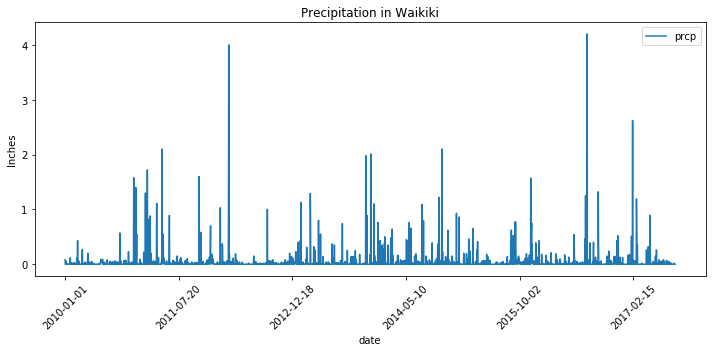

In [9]:
# Use Pandas Plotting with Matplotlib to plot the data for Waikiki
waikiki_rain = pd.DataFrame(waikiki_df, columns=['date','prcp'])
waikiki_rain = waikiki_rain.set_index('date')
# waikiki_rain
waikiki_rain.plot(rot=45)
plt.legend(loc='upper right')
plt.ylabel("Inches")
plt.title("Precipitation in Waikiki")
plt.rcParams["figure.figsize"] = [10,5]
plt.tight_layout()
plt.savefig("../visualizations/waikiki.png")
plt.show()

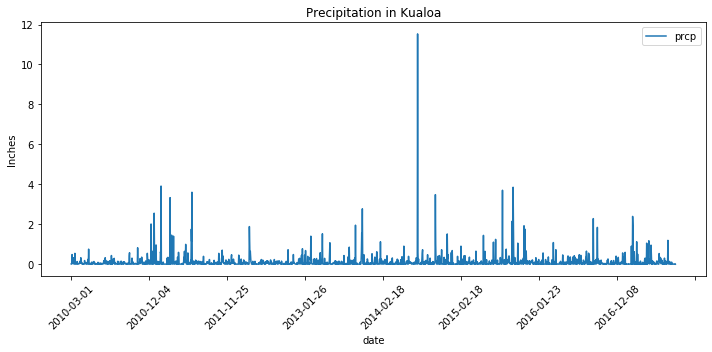

In [10]:
# Use Pandas Plotting with Matplotlib to plot the data for Kualoa
kualoa_rain = pd.DataFrame(kualoa_df, columns=['date','prcp'])
kualoa_rain = kualoa_rain.set_index('date')
# kualoa_rain
kualoa_rain.plot(rot=45)
plt.legend(loc='upper right')
plt.ylabel("Inches")
plt.title("Precipitation in Kualoa")
plt.rcParams["figure.figsize"] = [10,5]
plt.tight_layout()
plt.savefig("../visualizations/kualoa.png")
plt.show()

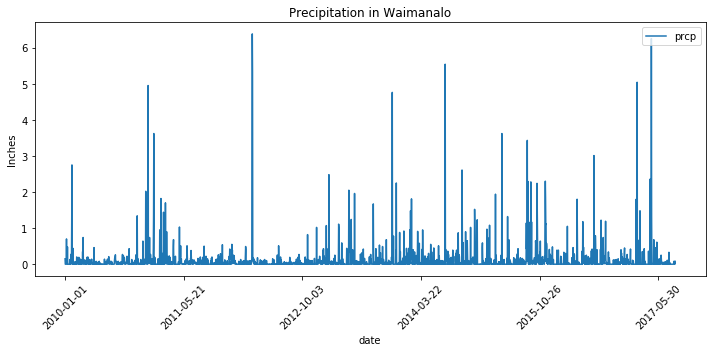

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data for waimanalo
waimanalo_rain = pd.DataFrame(waimanalo_df, columns=['date','prcp'])
waimanalo_rain = waimanalo_rain.set_index('date')
# waimanalo_rain
waimanalo_rain.plot(rot=45)
plt.legend(loc='upper right')
plt.ylabel("Inches")
plt.title("Precipitation in Waimanalo")
plt.rcParams["figure.figsize"] = [10,5]
plt.tight_layout()
plt.savefig("../visualizations/waimanalo.png")
plt.show()

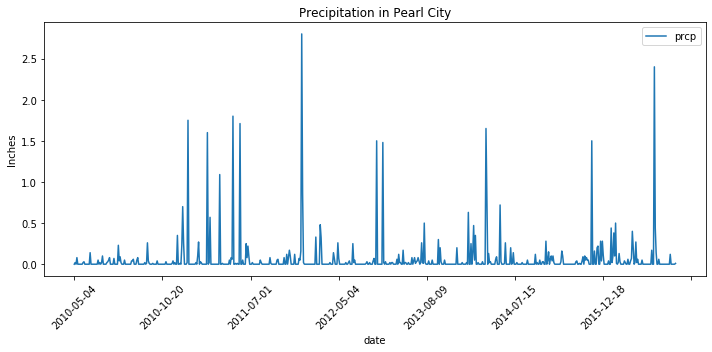

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data for pearl_city
pearl_city_rain = pd.DataFrame(pearl_city_df, columns=['date','prcp'])
pearl_city_rain = pearl_city_rain.set_index('date')
# pearl_city_rain
pearl_city_rain.plot(rot=45)
plt.legend(loc='upper right')
plt.ylabel("Inches")
plt.title("Precipitation in Pearl City")
plt.rcParams["figure.figsize"] = [10,5]
plt.tight_layout()
plt.savefig("../visualizations/pearl_city.png")
plt.show()

In [25]:
# group stations and sum precipitation
hawaii_group = hawaii_df.groupby(['station','name','latitude','longitude'])
hawaii_prcp = hawaii_group['prcp'].sum()
hawaii_group_df = pd.DataFrame({"Total Precipitation":hawaii_prcp})
hawaii_group_df = hawaii_group_df.sort_values("Total Precipitation", ascending=False)
hawaii_group_df.reset_index().to_csv("hawaii_prcp.csv",encoding='utf-8',header=True,index=False)
hawaii_group_df

,,,,Total Precipitation
station,name,latitude,longitude,
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,1068.09
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,588.64
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,382.62
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,295.68
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,234.49
USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,131.62
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,92.68
USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,70.87
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,43.44


In [26]:
# Configure gmaps
gmaps.configure(api_key=g_key)

In [27]:
# read in hawaii prcp csv
hawaii_prcp_map = pd.read_csv("hawaii_prcp.csv")
hawaii_prcp_map

,station,name,latitude,longitude,Total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,1068.09
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,588.64
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,382.62
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,295.68
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,234.49
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,131.62
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,92.68
7,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,70.87
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,43.44


In [28]:
# Store Lat and Lng into Locations
locations = hawaii_prcp_map[["latitude","longitude"]].astype(float)
humidity = hawaii_prcp_map["Total Precipitation"].astype(float)

# Create a humidity heatmap
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=humidity,dissipating=False,max_intensity=100,point_radius=.02)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
</dl>
"""
# Store the DataFrame Row
station_info = [info_box_template.format(**row) for index, row in hawaii_prcp_map.iterrows()]
locations = hawaii_prcp_map[["latitude", "longitude"]]

In [30]:
# Add marker layer ontop of heat map
fig = gmaps.figure()
markers = gmaps.marker_layer(locations,info_box_content=station_info)
fig.add_layer(heat_layer)
fig.add_layer(markers)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
hawaii_data_html = hawaii_df.to_html()
text_file = open("../assets/hawaii_data.html","w")
text_file.write(hawaii_data_html)
text_file.close()